# Regression With Sklearn

In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

c:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Here i am using quandl stock price data to forcast the price

In [3]:
style.use('ggplot')

quandl.ApiConfig.api_key = ""

In [4]:
# Getting Google Stock price data and loading as a Df
df = quandl.get('WIKI/GOOGL')
# Filter Df with only adj open,close,high,low,volume
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
#Calculate High Low precentage
df['HL_Presentage'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
#calculating Presentage change
df['Presentage_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
#adding new Row in DF
df = df[['Adj. Close', 'HL_Presentage', 'Presentage_Change','Adj. Volume']]
print(df.tail())
forecast_col = 'Adj. Close'
#Replacing null values
df.fillna(value=-99999, inplace=True)

            Adj. Close  HL_Presentage  Presentage_Change  Adj. Volume
Date                                                                 
2018-03-21     1094.00       1.976619           0.130884    1990515.0
2018-03-22     1053.15       3.265882          -2.487014    3418154.0
2018-03-23     1026.55       4.089299          -2.360729    2413517.0
2018-03-26     1054.09       4.818025           0.332191    3272409.0
2018-03-27     1006.94       6.707965          -5.353887    2940957.0


In [5]:
forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

In [6]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [10]:
#classifier = LinearRegression(n_jobs=-1)
#classifier.fit(X_train, y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(classifier, f)

In [11]:
pickle_in = open('linearregression.pickle','rb')
classifier = pickle.load(pickle_in)
accuracy = classifier.score(X_test, y_test)

In [12]:
forecast_set = classifier.predict(X_lately)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [13]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


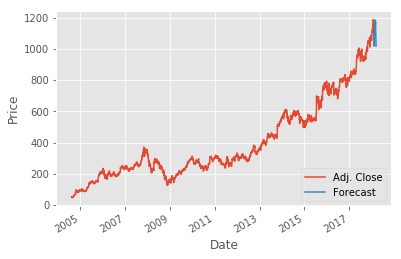

In [14]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()